# Importação das bibliotecas.

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import log_loss, f1_score, roc_curve
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

warnings.filterwarnings('ignore')

# Carga da base de dados

In [2]:
df = pd.read_csv("../data/raw/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         30697 non-null  object 
 1   combined_shot_type  30697 non-null  object 
 2   game_event_id       30697 non-null  int64  
 3   game_id             30697 non-null  int64  
 4   lat                 30697 non-null  float64
 5   loc_x               30697 non-null  int64  
 6   loc_y               30697 non-null  int64  
 7   lon                 30697 non-null  float64
 8   minutes_remaining   30697 non-null  int64  
 9   period              30697 non-null  int64  
 10  playoffs            30697 non-null  int64  
 11  season              30697 non-null  object 
 12  seconds_remaining   30697 non-null  int64  
 13  shot_distance       30697 non-null  int64  
 14  shot_made_flag      25697 non-null  float64
 15  shot_type           30697 non-null  object 
 16  shot

In [4]:
df.shape

(30697, 25)

In [5]:
df.isnull().sum()

action_type              0
combined_shot_type       0
game_event_id            0
game_id                  0
lat                      0
loc_x                    0
loc_y                    0
lon                      0
minutes_remaining        0
period                   0
playoffs                 0
season                   0
seconds_remaining        0
shot_distance            0
shot_made_flag        5000
shot_type                0
shot_zone_area           0
shot_zone_basic          0
shot_zone_range          0
team_id                  0
team_name                0
game_date                0
matchup                  0
opponent                 0
shot_id                  0
dtype: int64

In [27]:
df_filtered = df[df['shot_made_flag'].notnull()]
df_filtered = df_filtered[df_filtered['shot_type'] == '2PT Field Goal']

#Deixa no dataframe somente as colunas importantes
df_filtered = df_filtered[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs', 'shot_distance']]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

<AxesSubplot: >

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

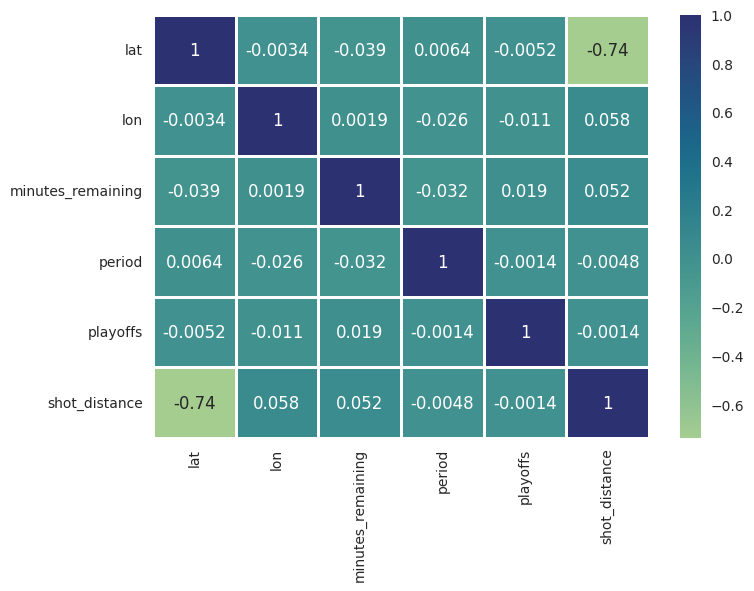

In [29]:
sns.heatmap(df_filtered.corr(), annot=True, linewidths=1, cmap='crest')

In [31]:
train_data = pd.read_parquet('../data/processed/base_train.parquet')
test_data = pd.read_parquet('../data/processed/base_test.parquet')

In [32]:
#Usando pycaret
setup(data=train_data, target='shot_made_flag')

,Description,Value
0,Session id,8804
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [34]:
logistic_model = create_model('lr')
#Faz a predição do modelo
logistic_prediction = predict_model(lr_model, data=test_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5669,0.6096,0.4936,0.5526,0.5214,0.1282,0.1289
1,0.5493,0.5682,0.4641,0.5328,0.4961,0.0919,0.0926
2,0.6118,0.6359,0.5258,0.6077,0.5638,0.2173,0.2192
3,0.5775,0.5865,0.4834,0.5671,0.5219,0.1476,0.1492
4,0.5854,0.6232,0.4852,0.5780,0.5276,0.1632,0.1651
5,0.5827,0.6119,0.4815,0.5749,0.5241,0.1578,0.1597
6,0.5783,0.5797,0.4760,0.5695,0.5186,0.1488,0.1507
7,0.5537,0.5671,0.4668,0.5372,0.4995,0.1004,0.1012
8,0.5634,0.5943,0.4594,0.5509,0.5010,0.1185,0.1201


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5743,0.5953,0.4708,0.5651,0.5137,0.1407,0.1426


In [35]:
evaluate_model(logistic_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
tree_model = create_model('dt')
#Faz a predição do modelo
tree_prediction = predict_model(tree_model, data=test_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5449,0.5272,0.5727,0.5218,0.5461,0.0918,0.0922
1,0.5220,0.5016,0.5709,0.5000,0.5331,0.0479,0.0483
2,0.5687,0.5509,0.6328,0.5410,0.5833,0.1419,0.1438
3,0.5607,0.5487,0.6089,0.5348,0.5695,0.1249,0.1260
4,0.5255,0.5058,0.5701,0.5024,0.5341,0.0546,0.0551
5,0.5194,0.4894,0.5590,0.4967,0.5260,0.0420,0.0423
6,0.5607,0.5486,0.5756,0.5370,0.5557,0.1224,0.1227
7,0.5308,0.5148,0.6125,0.5069,0.5547,0.0682,0.0695
8,0.5511,0.5364,0.5701,0.5273,0.5479,0.1034,0.1037


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5418,0.5187,0.5756,0.5181,0.5454,0.0861,0.0866


In [39]:
evaluate_model(tree_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [40]:
#Pesquisando o melhor modelo
best_model = compare_models(n_select = 1, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5913,0.5910,0.3847,0.6147,0.4731,0.1675,0.1797,0.0440
gbc,Gradient Boosting Classifier,0.5874,0.5868,0.3897,0.6047,0.4738,0.1601,0.1704,0.0890
lightgbm,Light Gradient Boosting Machine,0.5775,0.5867,0.4701,0.5695,0.5147,0.1468,0.1490,99.1980
lda,Linear Discriminant Analysis,0.5744,0.5966,0.4836,0.5632,0.5203,0.1419,0.1432,0.0090
lr,Logistic Regression,0.5742,0.5968,0.4799,0.5635,0.5183,0.1411,0.1426,0.0150
ridge,Ridge Classifier,0.5742,0.0000,0.4830,0.5629,0.5198,0.1413,0.1427,0.0080
qda,Quadratic Discriminant Analysis,0.5725,0.5956,0.5227,0.5554,0.5385,0.1410,0.1413,0.0090
nb,Naive Bayes,0.5717,0.5928,0.5017,0.5571,0.5279,0.1379,0.1386,0.0070
rf,Random Forest Classifier,0.5541,0.5644,0.5255,0.5333,0.5291,0.1058,0.1059,0.1400
et,Extra Trees Classifier,0.5529,0.5593,0.5441,0.5310,0.5372,0.1049,0.1050,0.1320


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [41]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the 

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

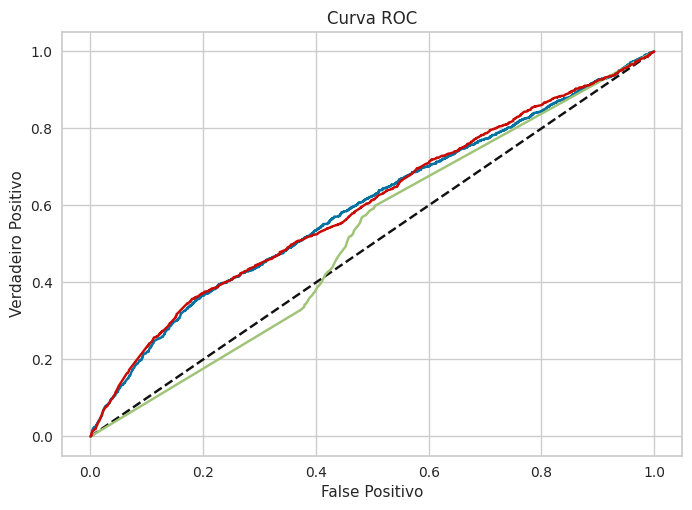

In [43]:
#Monta a curva ROC
X_test = test_data.drop('shot_made_flag', axis=1)
Y_test = test_data['shot_made_flag']

y_pred_prob1 = logistic_model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred_prob1)

y_pred_prob2 = tree_model.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred_prob2)

y_pred_prob3 = best_model.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred_prob3)

plt.title('Curva ROC')
plt.xlabel("False Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.legend()
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Decision Tree Classifier")
plt.plot(fpr3, tpr3, label= "Ada Boost Classifier") 
plt.show()